# Baseline Model for Twitter Sentiment Analysis

This model will use Multinomial Naive Bayes with Vector Count (bag of words) to classify the tweets.

It will create bi-grams to attempt to add context to the words in the tweets.

It will add a list of common stop words to remove from the tweets when creating the bi-grams.

Like the model in [nb_model_01](nb_model_01) the min document frequency will be tested when creating the bi-grams

# Imports and Constants

In [1]:
import pandas as pd
import numpy as np
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report, plot_confusion_matrix
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.metrics import precision_recall_curve, auc
from sklearn.metrics import accuracy_score, f1_score, recall_score
from sklearn.preprocessing import LabelBinarizer
import evaluation_functions
import ast

In [2]:
DATA_FILE_PATH = 'C:\\Users\\Yostina\\Twitter\\'
TOKENIZED_DATA_FILE_NAME = 'tokenized_Feedback_data.csv'
pd.set_option('display.max_colwidth', None)
RANDOM_STATE = 42

# Load Data

In [3]:
df = pd.read_csv(DATA_FILE_PATH + TOKENIZED_DATA_FILE_NAME)

In [18]:
df.head()

,No,fbid,Region,Sex,Age,Edu_Level,Feedback,Fb_Day,Fb_Month,Fb_Year,Category,sentiment,tokens
0,1,1,Debube,M,50,10+2,ማክሰኞ የቀረበው 3፡00 እስከ 4፡00 የቀረበው ጤናዎ በቤትዎ በልጆች እንቅልፍ ላይ በጣም ብዙነገር ተምረናል ጠቅላይ ሚኒስትር አብይ ፡፡,1,1,2008,ETV,-1,"[ማክሰኞ, የቀረበው, 3, ፡, 00, እስከ, 4, ፡, 00, የቀረበው, ጤናዎ, በቤትዎ, በልጆች, እንቅልፍ, ላይ, በጣም, ብዙነገር, ተምረናል, ጠቅላይ, ሚኒስትር, አብይ, ፡, ፡]"
1,2,2,Debube,M,50,10+3,በወቅታዊ እና ማህበራዊ ጉዳዮች ላይ የምታቀርቡት መረጃዎች በጣም ጥሩ ነው በዚሁ ቀጥሉ፡፡,1,1,2008,ETV,1,"[በወቅታዊ, እና, ማህበራዊ, ጉዳዮች, ላይ, የምታቀርቡት, መረጃዎች, በጣም, ጥሩ, ነው, በዚሁ, ቀጥሉ, ፡, ፡]"
2,3,3,Debube,M,50,10+4,ማክሰኞ የቀረበው ጤናዎ በቤትዎ ዝግጅት በህፃናት እንቅልፍ ላይ በጣም ጥሩ ትምህርት አግኝተናል በዚሁ ይቀጥል፡፡,1,1,2008,ETV,1,"[ማክሰኞ, የቀረበው, ጤናዎ, በቤትዎ, ዝግጅት, በህፃናት, እንቅልፍ, ላይ, በጣም, ጥሩ, ትምህርት, አግኝተናል, በዚሁ, ይቀጥል, ፡, ፡]"
3,4,4,Debube,M,50,10+5,በአሁኑ ሰዓት በጣም የምንከታተለው ጥሩ መረጃ የሚሰጥ ስለሆነ በዚሁ ተጠናክሮ ይቀጥል፡፡,1,1,2008,ETV,1,"[በአሁኑ, ሰዓት, በጣም, የምንከታተለው, ጥሩ, መረጃ, የሚሰጥ, ስለሆነ, በዚሁ, ተጠናክሮ, ይቀጥል, ፡, ፡]"
4,5,5,Debube,M,30,10,ቢያስተካክል የምንለው እንደዚህ አይነት አስተማሪ ፕሮግራም ሲቀርብ ስልክ የምታቀርቡት የውሸት ነው ግልፅ አይደለም ይህን ብታስተካክሉ፡፡,1,1,2008,ETV,0,"[ቢያስተካክል, የምንለው, እንደዚህ, አይነት, አስተማሪ, ፕሮግራም, ሲቀርብ, ስልክ, የምታቀርቡት, የውሸት, ነው, ግልፅ, አይደለም, ይህን, ብታስተካክሉ, ፡, ፡]"


In [19]:
# convert list of strings represented as a string to a list of strings
df.tokens = df.tokens.map(ast.literal_eval)

ValueError: malformed node or string: ['ማክሰኞ', 'የቀረበው', '3', '፡', '00', 'እስከ', '4', '፡', '00', 'የቀረበው', 'ጤናዎ', 'በቤትዎ', 'በልጆች', 'እንቅልፍ', 'ላይ', 'በጣም', 'ብዙነገር', 'ተምረናል', 'ጠቅላይ', 'ሚኒስትር', 'አብይ', '፡', '፡']

In [ ]:
data = df[['tokens', 'Category']]

In [20]:
data.head()

,tokens,Category
0,"[ማክሰኞ, የቀረበው, 3, ፡, 00, እስከ, 4, ፡, 00, የቀረበው, ጤናዎ, በቤትዎ, በልጆች, እንቅልፍ, ላይ, በጣም, ብዙነገር, ተምረናል, ጠቅላይ, ሚኒስትር, አብይ, ፡, ፡]",ETV
1,"[በወቅታዊ, እና, ማህበራዊ, ጉዳዮች, ላይ, የምታቀርቡት, መረጃዎች, በጣም, ጥሩ, ነው, በዚሁ, ቀጥሉ, ፡, ፡]",ETV
2,"[ማክሰኞ, የቀረበው, ጤናዎ, በቤትዎ, ዝግጅት, በህፃናት, እንቅልፍ, ላይ, በጣም, ጥሩ, ትምህርት, አግኝተናል, በዚሁ, ይቀጥል, ፡, ፡]",ETV
3,"[በአሁኑ, ሰዓት, በጣም, የምንከታተለው, ጥሩ, መረጃ, የሚሰጥ, ስለሆነ, በዚሁ, ተጠናክሮ, ይቀጥል, ፡, ፡]",ETV
4,"[ቢያስተካክል, የምንለው, እንደዚህ, አይነት, አስተማሪ, ፕሮግራም, ሲቀርብ, ስልክ, የምታቀርቡት, የውሸት, ነው, ግልፅ, አይደለም, ይህን, ብታስተካክሉ, ፡, ፡]",ETV


# Split Data

In [21]:
X_train, X_test, y_train, y_test = train_test_split(data['tokens'], 
                                                    data['Category'],
                                                   test_size = 0.2,
                                                   random_state = RANDOM_STATE,
                                                   stratify = data['Category'])

In [22]:
X_train.shape

(12,)

In [23]:
X_test.shape

(3,)

# Encode Labels

In [24]:
le = LabelEncoder()

In [25]:
y_train_enc = le.fit_transform(y_train)

In [26]:
y_test_enc = le.transform(y_test)

# Evaluate Adjustments to Minimum Document Frequency

In [27]:
class stop_word_remover:
    def __init__(self):
         self.stop_words = frozenset(['ቀጥሉ', 'ይቀጥል'])
    def __call__(self, doc):
        return [t for t in doc if t not in self.stop_words]

In [28]:
def passthrough(doc):
    """passthrough function for use in the pipeline because the text is already tokenized"""
    return doc

In [29]:
def train_and_eval_model(min_df, ngram_range):
    """
    Train and Evaluate and Bag of Words Representation with a Naive Bayes
    classifier with a specified minimum document frequency.
    """
    
    pipeline = Pipeline([
    ('bow',CountVectorizer(min_df=min_df, 
                           ngram_range=ngram_range, 
                           max_features=10000, 
                           preprocessor=stop_word_remover(), 
                           tokenizer=passthrough)), 
    ('classifier', MultinomialNB()),
    ])
    
    pipeline.fit(X_train,y_train_enc)
    
    print(f'MINIMUM DOCUMENT FREQUENCY = {min_df}')
    print('')
    
    evaluation_functions.confustion_matrix_and_classification_report(pipeline, 
                                                                 X_train, 
                                                                 y_train_enc, 
                                                                 le.classes_, 
                                                                 'Training')
    
    evaluation_functions.confustion_matrix_and_classification_report(pipeline, 
                                                                 X_test, 
                                                                 y_test_enc, 
                                                                 le.classes_,
                                                                 'Test')
    
    lb = LabelBinarizer()
    lb.fit(y_test_enc)
    y_test_multi = lb.transform(y_test_enc)
    y_hat_test_multi = pipeline.predict_proba(X_test)
    
    evaluation_functions.pr_curves(y_test_multi, y_hat_test_multi, le.classes_)
    
    train_accuracy = accuracy_score(y_train_enc, pipeline.predict(X_train))
    
    test_accuracy = accuracy_score(y_test_enc, pipeline.predict(X_test))
        
    recall_scores = recall_score(y_test_enc, pipeline.predict(X_test), average=None)
    
    test_results = np.append(np.array([min_df, train_accuracy, test_accuracy]),
                             recall_scores)
   
    return test_results
    

MINIMUM DOCUMENT FREQUENCY = 1

Classification Report for Training Set
              precision    recall  f1-score   support

         ETV       1.00      1.00      1.00        12

    accuracy                           1.00        12
   macro avg       1.00      1.00      1.00        12
weighted avg       1.00      1.00      1.00        12



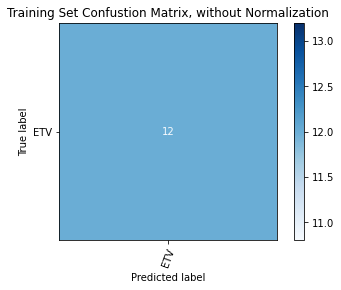

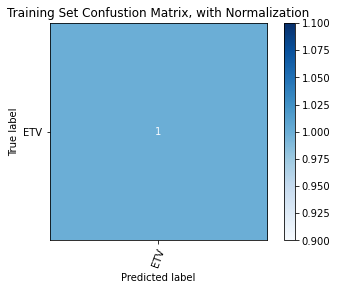

Classification Report for Test Set
              precision    recall  f1-score   support

         ETV       1.00      1.00      1.00         3

    accuracy                           1.00         3
   macro avg       1.00      1.00      1.00         3
weighted avg       1.00      1.00      1.00         3



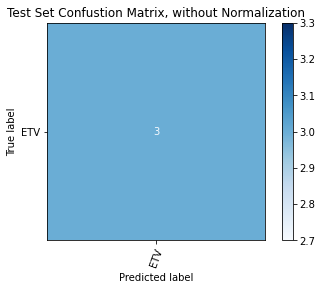

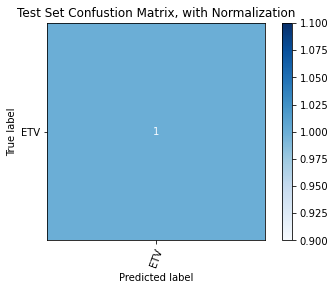

C:\Users\Yostina\anaconda3\lib\site-packages\sklearn\metrics\_ranking.py:817: RuntimeWarning: invalid value encountered in true_divide
  recall = tps / tps[-1]


IndexError: index 1 is out of bounds for axis 1 with size 1

In [30]:
metrics_summary = []

for min_df in range(1,21):
    test_scores = train_and_eval_model(min_df, ngram_range=(2,2))
    metrics_summary.append(test_scores)

In [ ]:
metrics_summary_df = pd.DataFrame(metrics_summary, 
                                  columns=['min doc freq',
                                           'train accuracy',
                                           'test accuracy',
                                          'neg recall',
                                          'neutral recall',
                                          'pos recall'])

metrics_summary_df

In [ ]:
metrics = train_and_eval_model(min_df=0, ngram_range=(2,2))

# Summary

In the model with bi-grams, the performance is worse than the Naive Bayes Classifier model that just adjusted for minimum document frequency when looking at the recall scores.  The accuracy was about the same.